In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (local)
dataset = pd.read_csv('carPrice_Assignment.csv')

# Preview data
print(dataset.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [15]:
# Independent variable (Engine Size)
X = dataset.iloc[:, 0:1].values   # 2D array

# Dependent variable (Car Price)
y = dataset.iloc[:, 1].values


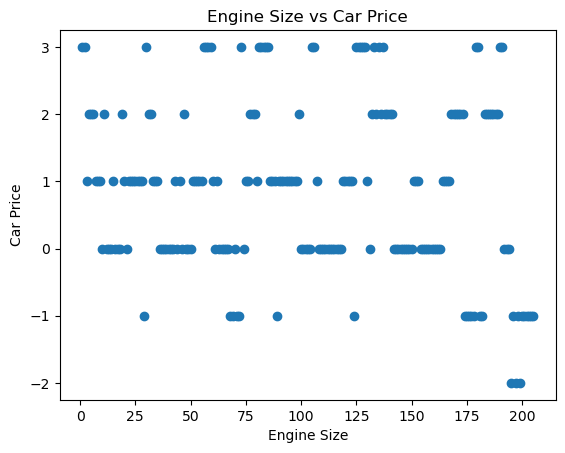

In [3]:
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predict
y_lin_pred = lin_reg.predict(X)


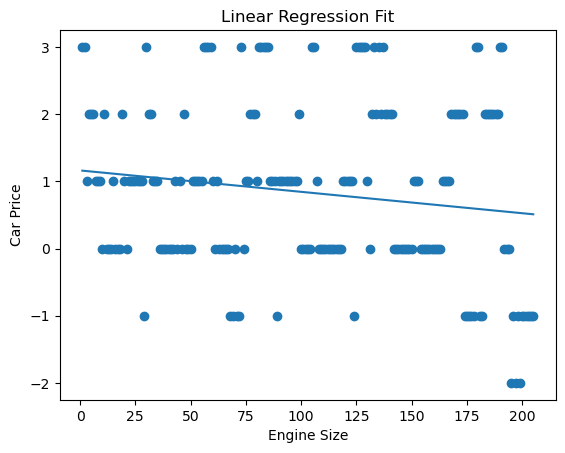

In [5]:
plt.scatter(X, y)
plt.plot(X, y_lin_pred)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear Regression Fit")
plt.show()


In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 3 polynomial (best for saturation pattern)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [7]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)


LinearRegression()

C:\Users\Sreeja Reddy\AppData\Local\Temp\ipykernel_16212\59974600.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


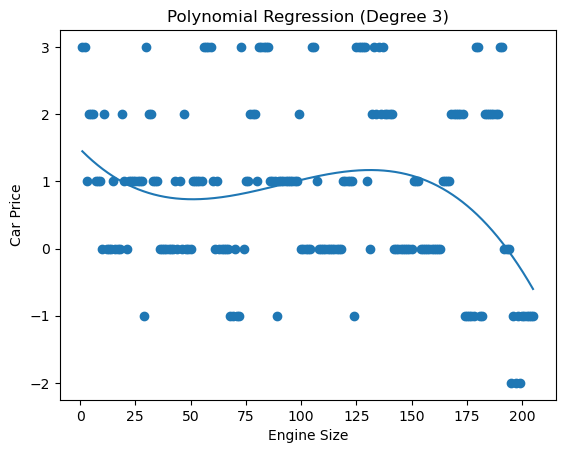

In [8]:
# Smooth curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y)
plt.plot(X_grid, poly_reg.predict(poly.transform(X_grid)))
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [9]:
# Predict for engine size = 3.2
engine_size = 3.2
predicted_price = poly_reg.predict(poly.transform([[engine_size]]))

print("Predicted Price:", predicted_price[0])


Predicted Price: 1.377307737541745


In [10]:
from sklearn.metrics import r2_score

# R² scores
r2_linear = r2_score(y, y_lin_pred)
r2_poly = r2_score(y, poly_reg.predict(X_poly))

print("R² Linear Regression:", r2_linear)
print("R² Polynomial Regression:", r2_poly)


R² Linear Regression: 0.022988969275045346
R² Polynomial Regression: 0.09441174317244982


In [16]:
engine_200 = [[200]]

linear_pred_200 = lin_reg.predict(engine_200)
print("Linear Model Prediction for Engine Size = 200:", linear_pred_200[0])


Linear Model Prediction for Engine Size = 200: 0.5254098703180065


In [17]:
poly_pred_200 = poly_reg.predict(poly.transform(engine_200))
print("Polynomial Model Prediction for Engine Size = 200:", poly_pred_200[0])


Polynomial Model Prediction for Engine Size = 200: -0.33558088898856075


In [18]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (Degree 3)"],
    "Predicted Price for Engine Size = 200": [
        linear_pred_200[0],
        poly_pred_200[0]
    ]
})

print(comparison)


                              Model  Predicted Price for Engine Size = 200
0                 Linear Regression                               0.525410
1  Polynomial Regression (Degree 3)                              -0.335581


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear model errors
mae_linear = mean_absolute_error(y, y_lin_pred)
mse_linear = mean_squared_error(y, y_lin_pred)
rmse_linear = np.sqrt(mse_linear)

# Polynomial model errors
mae_poly = mean_absolute_error(y, poly_reg.predict(X_poly))
mse_poly = mean_squared_error(y, poly_reg.predict(X_poly))
rmse_poly = np.sqrt(mse_poly)

print("Linear MAE:", mae_linear)
print("Linear RMSE:", rmse_linear)

print("Polynomial MAE:", mae_poly)
print("Polynomial RMSE:", rmse_poly)


Linear MAE: 1.0056290770872496
Linear RMSE: 1.2279035531793363
Polynomial MAE: 0.9656043675328957
Polynomial RMSE: 1.182169944513369


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear model errors
mae_linear = mean_absolute_error(y, y_lin_pred)
mse_linear = mean_squared_error(y, y_lin_pred)
rmse_linear = np.sqrt(mse_linear)

# Polynomial model errors
mae_poly = mean_absolute_error(y, poly_reg.predict(X_poly))
mse_poly = mean_squared_error(y, poly_reg.predict(X_poly))
rmse_poly = np.sqrt(mse_poly)

print("Linear MAE:", mae_linear)
print("Linear RMSE:", rmse_linear)

print("Polynomial MAE:", mae_poly)
print("Polynomial RMSE:", rmse_poly)


Linear MAE: 1.0056290770872496
Linear RMSE: 1.2279035531793363
Polynomial MAE: 0.9656043675328957
Polynomial RMSE: 1.182169944513369


In [ ]:
Train_pred= model.predict(X_train)
y_train_score= 
